In [56]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Step 2: Load Dataset

# Replace with your local path
data = pd.read_csv("Task 3 Dataset - Bank.csv", sep=',')  # CSV uses commas

# Preview dataset
print("Dataset preview:")
display(data.head())

# Strip any extra spaces from column names
data.columns = data.columns.str.strip()
print("\nColumns detected:")
print(data.columns.tolist())


Dataset preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



Columns detected:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [60]:
# Step 3: Data Preprocessing

# Check for missing values
print("\nMissing values in dataset:")
print(data.isnull().sum())

# Encode target variable 'deposit' as 0 (no) and 1 (yes)
le_target = LabelEncoder()
data['deposit'] = le_target.fit_transform(data['deposit'])

# Encode categorical features (excluding target)
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'deposit']

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Preview processed dataset
print("\nProcessed dataset preview:")
display(data.head())


Missing values in dataset:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Processed dataset preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [62]:
# Step 4: Split Features and Target

X = data.drop('deposit', axis=1)
y = data['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [64]:
# Step 5: Train Decision Tree Classifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


Accuracy on test set: 0.79


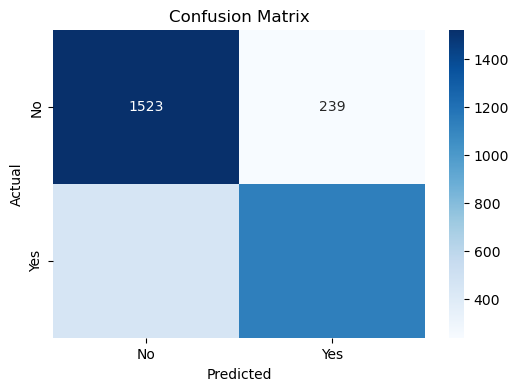


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1762
           1       0.83      0.71      0.77      1587

    accuracy                           0.79      3349
   macro avg       0.80      0.79      0.79      3349
weighted avg       0.80      0.79      0.79      3349



In [70]:
# Step 6: Predictions & Evaluation
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


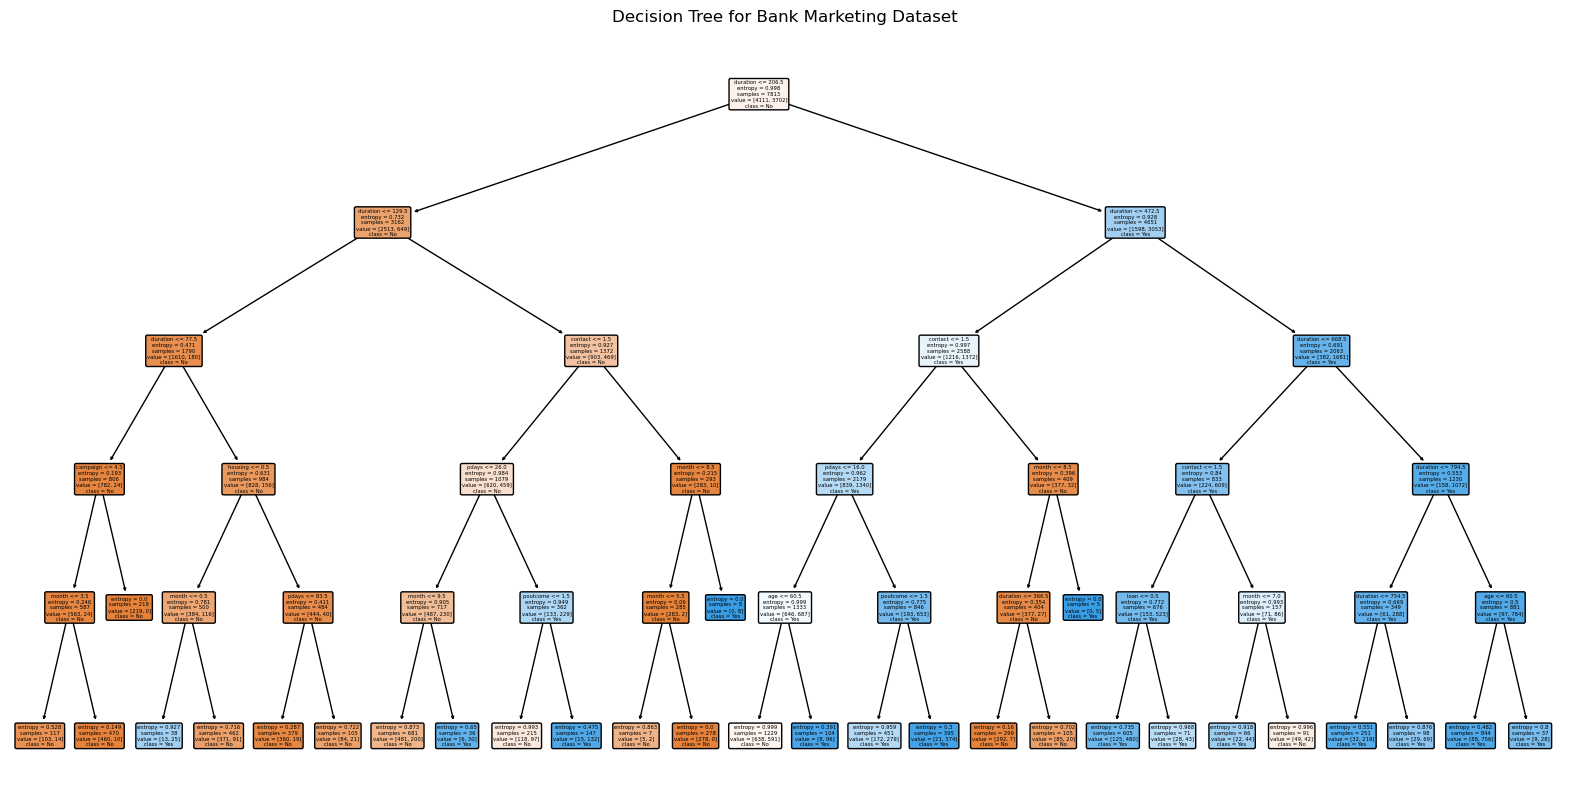

In [68]:
# Step 7: Visualize Decision Tree

plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Bank Marketing Dataset")
plt.show()